# Migrate Facility

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This case study is meant to demonstrate how to use *gstlearn* for migrating information from Db to DbGrid and vice-versa. Note that, in order to test the whole possibilities, we add a selection to both files.

In [2]:
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt
import numpy as np

Global parameters.

In [3]:
ndim = 2
gl.defineDefaultSpace(gl.ESpaceType.RN,ndim)

Generate initial data set

In [4]:
data = gl.Db.createFillRandom(ndat=20, ndim=ndim, nvar=1)
data.addSelectionByRanks(np.arange(2,18))
data.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 20
Number of active samples     = 16

Variables
---------
Column = 0 - Name = x-1 - Locator = x1
Column = 1 - Name = x-2 - Locator = x2
Column = 2 - Name = z - Locator = z1
Column = 3 - Name = NewSel - Locator = sel
 

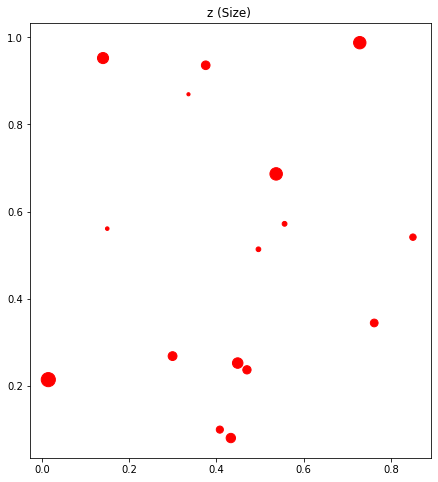

In [5]:
gp.plot(data, name_size="z")

Create a grid, over the [0,1] x [0,1]

In [6]:
grid = gl.DbGrid.create([50,50],dx=[0.02,0.02])
grid.addSelectionFromDbByConvexHull(data,0.05)
grid.display()


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 2500
Number of active samples     = 1738

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      0.020     0.020
Number :         50        50

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Hull - Locator = sel
 

Migrate the information from **data** to **grid**. The migration is limited to te cell to which each sample belongs.

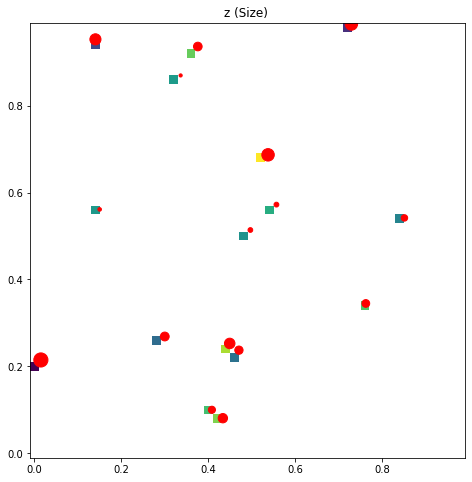

In [7]:
err = gl.migrate(data, grid, "z", namconv=gl.NamingConvention("Migrate-NoFill",False))
ax = gp.grid(grid)
ax = gp.plot(data)

In this second attempt, we use the **flag_fill** option to fill the whole grid. However we compensate by specifying a maximum filling distance. Moreover we make this maximum distance anisotropic for ckecking.

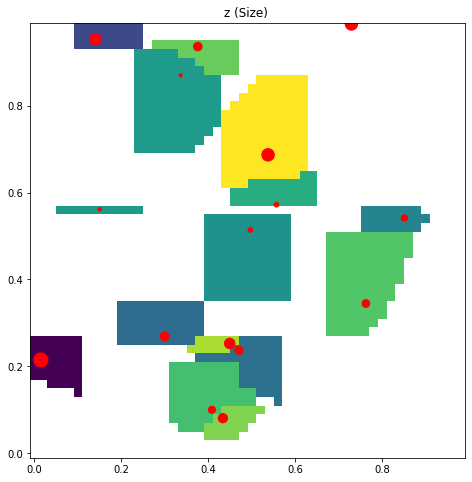

In [8]:
err = gl.migrate(data, grid, "z", flag_fill=True, dmax=[0.1,0.2], 
                 namconv=gl.NamingConvention("Migrate-Fill",False))
ax = gp.grid(grid)
ax = gp.plot(data)

## Ball Tree

Ball Tree is a special algorithm which makes search much more efficient. The principle is to build a Ball Tree based on a first data set. Then, using this tree, it is easy to consider a second data base and to search for the set of samples of the first data base which are the closest neighbors of each sample of the second data base.

To delonstrate this facility, we consider the case where we cannot benefit from any specific oragnization (grid for example) for any of the two data bases. Moreover (although this is a demnstration file, not a bench marking one), we consider a dense data set for better legibility

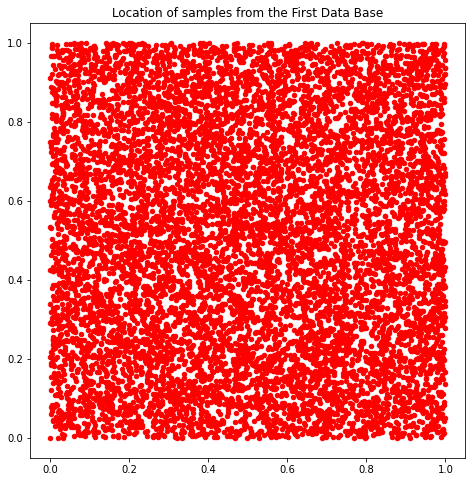

In [9]:
ndat = 10000
db = gl.Db.createFillRandom(ndat)
ax = gp.point(db)
ax.decoration(title="Location of samples from the First Data Base")

We build the corresponding BallTree structure

In [10]:
ball = gl.Ball(db, 10, 1)

Using the Euclidean distance
 

We now consider one target location and ask for the set of corresponding neighboring samples (say 10 closest samples). The target site is selected as the center of the square.

In [11]:
neigh_size = 500
center = [0.5, 0.5]
knn1 = ball.queryOneAsVD(gl.VectorDouble(center), neigh_size)

The returned argument is a C objet (not mapped explicitly for Pythonn ... yet). However, some (statc) functions are available to retreive the contents of this objects. We use *getIndices* which returns the vector of ranks of samples constituting the neighborhood of the target site.

In [12]:
target = db.clone()
target.deleteColumn("Selection")
iuid = target.addSelectionByRanks(gl.getIndices(knn1), "Selection")

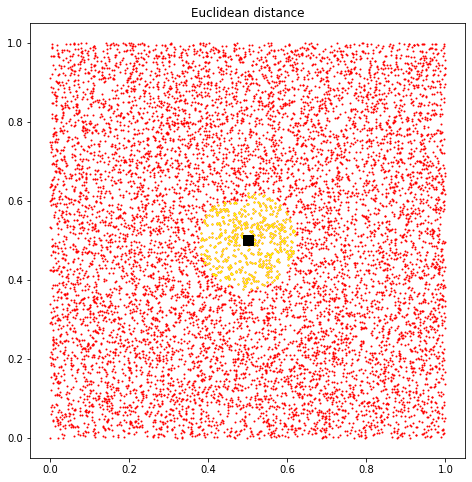

In [13]:
ax = gp.point(db, size=1)
ax = gp.point(target, color="yellow", flagCst=True, size=1)
ax = gp.sample(center, marker='s')
ax.decoration(title="Euclidean distance")

We can produce a similar figure changing the distance, from Euclidean to Manhattan.

In [14]:
ball = gl.Ball(db, 10, 0)

knn2 = ball.queryOneAsVD(gl.VectorDouble(center), neigh_size)

target = db.clone()
target.deleteColumn("Selection")
iuid = target.addSelectionByRanks(gl.getIndices(knn2), "Selection")

Using the Manhattan distance
 

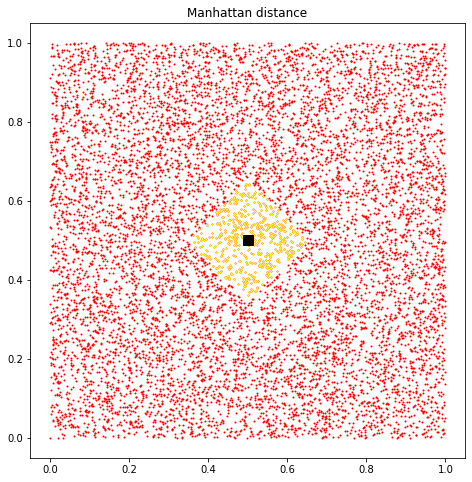

In [15]:
ax = gp.point(db, size=1)
ax = gp.point(target, color="yellow", flagCst=True, size=1)
ax = gp.sample(center, marker='s')
ax.decoration(title="Manhattan distance")